In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.utils import np_utils

# Dataset loading

In [53]:
(X_train,y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Data visualization

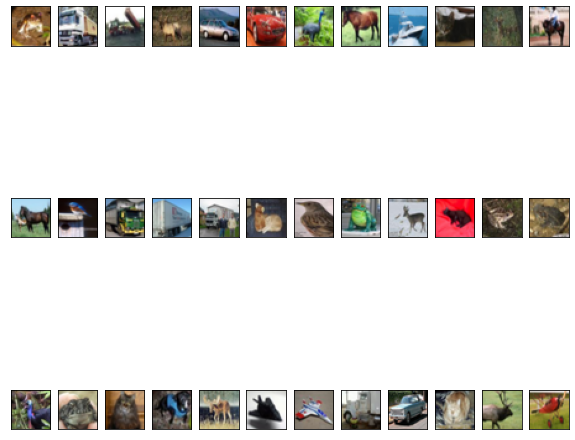

In [54]:
fig = plt.figure(figsize=(10,10))
for i in range(36):
  ax = fig.add_subplot(3,12,i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(X_train[i]))


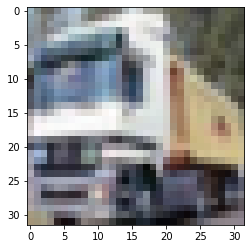

In [31]:
from skimage.io import imread
from skimage.transform import resize
image = X_train[1]
plt.imshow(image, cmap='gray')

# Data scaling

In [55]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [56]:
num_class = len(np.unique(y_train))
y_train_cat = keras.utils.np_utils.to_categorical(y_train, num_class)
y_test_cat =  keras.utils.np_utils.to_categorical(y_test, num_class)

In [57]:
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [58]:
print('Train sample size:',X_train.shape[0])
print('Validation sample size:',X_valid.shape[0])
print('Test sample size:',X_test.shape[0])


Train sample size: 45000
Validation sample size: 5000
Test sample size: 10000


In [59]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping


# Model creation

In [60]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Model training without image augmentation

In [40]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
1407/1407 [==============================] - 14s 9ms/step - loss: 1.5715 - accuracy: 0.4392 - precision: 0.6357 - recall: 0.2379 - val_loss: 1.2344 - val_accuracy: 0.5526 - val_precision: 0.7680 - val_recall: 0.3668
Epoch 2/20
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1055 - accuracy: 0.6094 - precision: 0.7552 - recall: 0.4694 - val_loss: 0.8507 - val_accuracy: 0.7008 - val_precision: 0.8108 - val_recall: 0.5890
Epoch 3/20
1407/1407 [==============================] - 12s 8ms/step - loss: 0.9117 - accuracy: 0.6866 - precision: 0.7986 - recall: 0.5744 - val_loss: 0.7561 - val_accuracy: 0.7392 - val_precision: 0.8387 - val_recall: 0.6520
Epoch 4/20
1407/1407 [==============================] - 11s 8ms/step - loss: 0.8234 - accuracy: 0.7182 - precision: 0.8183 - recall: 0.6218 - val_loss: 0.7679 - val_accuracy: 0.7406 - val_precision: 0.8217 - val_recall: 0.6702
Epoch 5/20
1407/1407 [==============================] - 11s 8ms/step - loss: 0.7331 - accura

# Impact of Image Augmentation

In [41]:
from keras.preprocessing.image import ImageDataGenerator

In [42]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [47]:
r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_test), 
             batch_size=batch_size)

Epoch 1/50
1406/1406 [==============================] - 28s 20ms/step - loss: 0.4766 - accuracy: 0.8389 - precision: 0.8873 - recall: 0.7951 - val_loss: 0.4401 - val_accuracy: 0.8533 - val_precision: 0.8966 - val_recall: 0.8142
Epoch 2/50
1406/1406 [==============================] - 29s 21ms/step - loss: 0.4674 - accuracy: 0.8404 - precision: 0.8888 - recall: 0.7981 - val_loss: 0.4665 - val_accuracy: 0.8465 - val_precision: 0.8827 - val_recall: 0.8136
Epoch 3/50
1406/1406 [==============================] - 28s 20ms/step - loss: 0.4532 - accuracy: 0.8467 - precision: 0.8916 - recall: 0.8059 - val_loss: 0.4533 - val_accuracy: 0.8516 - val_precision: 0.8881 - val_recall: 0.8222
Epoch 4/50
1406/1406 [==============================] - 29s 21ms/step - loss: 0.4577 - accuracy: 0.8442 - precision: 0.8897 - recall: 0.8046 - val_loss: 0.4850 - val_accuracy: 0.8412 - val_precision: 0.8795 - val_recall: 0.8022
Epoch 5/50
1406/1406 [==============================] - 29s 20ms/step - loss: 0.4430 - a

# Model Evaluation

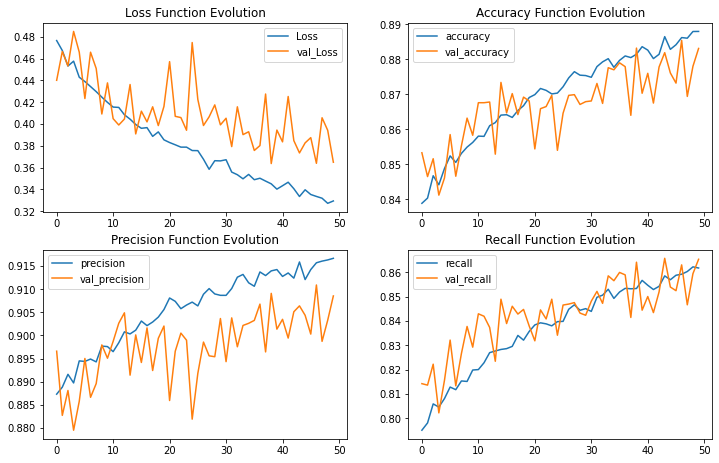

In [48]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [49]:
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 2s 7ms/step - loss: 0.3650 - accuracy: 0.8831 - precision: 0.9085 - recall: 0.8653
Test Accuracy : 88.31%
